In [1]:
from pylab import *

%run ~/pizza/src/pizza.py

Pizza.py (9 Oct 2015), a toolkit written in Python
type ? for help, CTRL-D to quit
Loading tools ...
image tool did not load:
  No module named Pmw
animate tool did not load:
  No module named ImageTk
gl tool did not load:
  No module named OpenGL.Tk


In [2]:
data = dump("dump.lammpstrj")

5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 61000 62000 63000 64000 65000
read 61 snapshots
61 snapshots selected out of 61
assigned columns: id type x y z vx vy vz v_g 
dump is already unscaled


In [3]:
r_center = array([16.8, 16.8])
t = data.time(); nt = size(t); tmp_time, box, atoms, bonds, tris, lines = data.viz(0)

In [4]:
import seaborn
seaborn.set()

In [5]:
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 16

In [6]:
x = array(data.vecs(t[-1], "x"))
y = array(data.vecs(t[-1], "y"))
z = array(data.vecs(t[-1], "z"))

vx = array(data.vecs(t[-1], "vx"))
vy = array(data.vecs(t[-1], "vy"))
vz = array(data.vecs(t[-1], "vz"))

v_g = array(data.vecs(t[-1], "v_g")).astype(bool)

y_g = y[v_g]
z_g = z[v_g]

vx_g = vx[v_g]
vy_g = vy[v_g]
vz_g = vz[v_g]

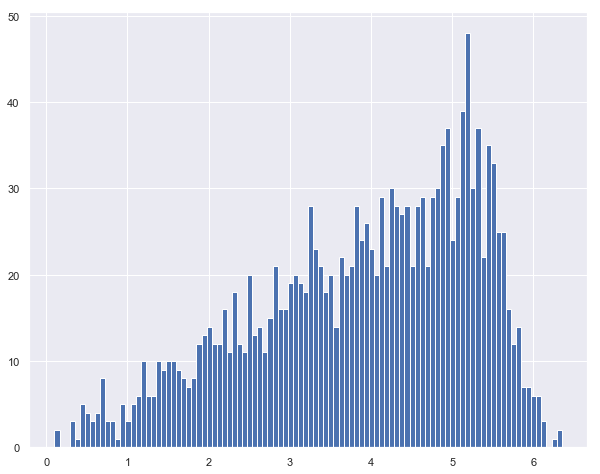

In [7]:
positions = r_center - array(zip(y_g, z_g))
velocities = array(zip(vx_g, vy_g, vz_g))

speed = sqrt(velocities[:, 0]**2 + velocities[:, 1]**2 + velocities[:, 2]**2)
r = sqrt(positions[:, 0]**2 + positions[:, 1]**2)

argpos = argsort(r)
hist(r, bins=100)
show()

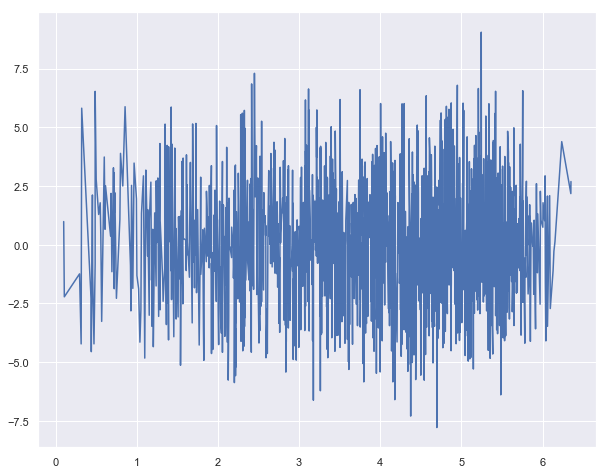

In [12]:
plot(r[argpos], vz_g[argpos])

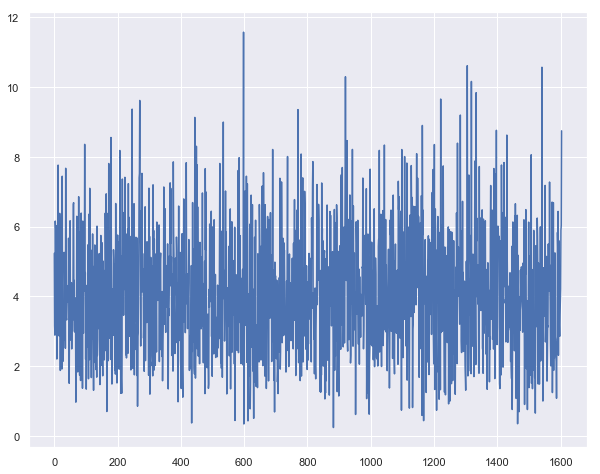

In [9]:
plot(speed[argpos])